# 統計學習初論 (Spring, 2019)

Homework 1

截止日期: 9AM, 2019/3/5
請將HTML檔上傳至Ceiba作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

# 第一題 [myknn_regressor]

(50%) K-nearest-neighbors (KNN) is a power method to construct nonparametric regression models. The goal of this question is to construct your own KNN regressor. To simplify the question, we are going to use the "brute-force" method to find nearest neighbors. That is, we are not going to use specialized data structures such as the K-D tree to speed up the process. Given a set of N training data points and a pre-defined hyper-parameter k, the prediction for a testing data point xa is computed by locating k data points in the training data that is cloest to xa. If the outcome values of the k nearest neighbors are ya={y1,y2,...,yk}, then the prediction is f(ya), where f is a real-valued function. We are going to consider two possible choices of f. The first option is f(ya)=1/k∑ki=1yi. This is referred to as the "equal-weight" case. The other option is to compute the mean after removing outliers. We define outliers as the data points that are outside of [Q1−1.5IQR,Q3+1.5IQR], where Q1 and Q3 are the first and third quantile of ya, and IQR=Q3−Q1. Since quantiles and IQR only make sense when there are enough neighbors, we allow the "remove_outliers" only if k>=10. If k<10, use the "equal_weight" f even if the user specify the other way.

Creat a Python class named myknn_regressor that can do predictions given training data and hyper-parameters. It should take the k as the hyper-parameter for the number of neighbors. Moreover, the user can select f by passing "equal_weight" or "remove_outliers" to switch between the two possible cases for f.

The sample usage should be like the following:

The first line initiates an myknn_regressor object with  k=20  and selected "remove_outliers" for  f ; the second line train the model and the third line computes prediction.

You are only allowed to use numpy in your own myknn_regressor class. You will receive a zero score if you adopted an existing KNN regressor such as those in scikit-learn. The input features and output predictions should be numpy arrays. If there is a tie in selecting neighbors, myknn_regressor should break the tie by choosing the data point that is located closer to the beginning of the training dataset.

Dataset

We are going to use a subset of the "Million Songs Dataset" in this question. The dataset has been pre-processed and the training and testing dataset has been splitted and stored in a dictionary data structure. You can load the data from msd_data1.pickle using pickle.load(). There are four elements in the dictionary: X_train, Y_train, X_test, Y_test. As indicated by their names, these four elements are training and testing data. The outcome variable (i.e.  y ) is the year a song was released, and the features are variables that characterize the sound of a song. The goal is to predict the release year given sound features.

Answer the following questions:

Q1.1 Create your myknn_regressor.

Q1.2 Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  k=20  and "equal_weight"  f . List the RMSE and the first 20 predictions in the testing data.

Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  k=20  and "remove_outier"  f . List the RMSE and the first 20 predictions in the testing data.

In [1]:
#Q1.1 Create your myknn_regressor.

In [2]:
import numpy as np
class myknn_regressor(object):
    def __init__(self,k,method):
        self.k =int(k)
        self.method=method
        if self.k<10:
            self.method="equal_weight"
    def fit(self, X, y):
        self.x=np.array(X)
        self.y=np.array(y)
    def predict(self,test):
        if self.method=="equal_weight":
            self.output=[]
            for i in range(len(test)):
                dist=[]
                for j in range(len(self.x)):
                    d=np.linalg.norm(test[i]-self.x[j])
                    dist.append([d,int(j)])
                dist=sorted(dist, key = lambda x : x[0])
                index=np.array(dist[:self.k])[:,1].astype("int")
                self.output.append(self.y[index])
            return np.mean(self.output,axis=1)
            
            
        elif self.method=="remove_outliers":
            self.output=[]
            for i in range(len(test)):
                dist=[]
                for j in range(len(self.x)):
                    d=np.linalg.norm(test[i]-self.x[j])
                    dist.append([d,j])
                dist=sorted(dist, key = lambda x : x[0])
                index=np.array(dist[:self.k])[:,1].astype("int")
                self.output.append(self.y[index])
            self.output=np.array(self.output)
            Q1=np.percentile(self.output, 25,axis=1)
            Q3=np.percentile(self.output,75,axis=1)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR
            upper=Q3+1.5*IQR
            new=[]
            for i in range(self.output.shape[0]):
                ans=[]
                for j in range(self.k):
                    if lower[i]<=self.output[i][j]<=upper[i]:
                        ans.append(self.output[i][j])
                new.append(ans)
            ans=[]
            for j in range(len(new)):
                ans.append(np.mean(new[j]))
            return np.array(ans)
        else:
            print("error")      

In [3]:
import pickle
infile = open("C://Users//POPO//Desktop//msd_data1.pickle",'rb')
new_dict = pickle.load(infile)
X_train=new_dict["X_train"]
Y_train=new_dict["Y_train"]
X_test=new_dict["X_test"]
Y_test=new_dict["Y_test"]

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(5000, 90)
(5000,)
(3000, 90)


In [5]:
#Q1.2 Load data from msd_data1.pickle. 
#You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. 
#Make predictions using k=20 and "equal_weight" f . List the RMSE and the first 20 predictions in the testing data.

In [6]:
X_train=(X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
X_test=(X_test-np.mean(X_train,axis=0))/np.std(X_train,axis=0)

In [7]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred=myknn.predict(X_test)

In [8]:
ypred[:20]

array([2000.1 , 2002.55, 2001.8 , 1998.6 , 1999.75, 1998.5 , 2003.25,
       2001.8 , 2003.2 , 1999.85, 2000.4 , 2000.95, 2000.15, 2000.6 ,
       2003.15, 2002.2 , 1999.2 , 2000.  , 1999.1 , 2004.05])

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ypred, Y_test))
rms

11.410289435417491

In [10]:
#Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. 
#Make predictions using k=20 and "remove_outier" f . List the RMSE and the first 20 predictions in the testing data.

In [11]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [12]:
ypred[:20]

array([2003.55555556, 2004.61111111, 2002.89473684, 2000.78947368,
       2003.16666667, 2001.77777778, 2004.66666667, 2002.89473684,
       2004.61111111, 2002.10526316, 2002.68421053, 2003.26315789,
       2003.61111111, 2002.89473684, 2004.        , 2002.2       ,
       2002.55555556, 2003.44444444, 2002.44444444, 2006.52941176])

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ypred, Y_test))
rms

11.948127186003665

# 第二題 [Tuning the Hyper-parameter]

(50%) We are going to explore the issue of hyper-parameter tuning in this question. We are going to consider three cases in this question. Use the knn regressor from klearn.neighbors.KNeighborsRegressor for the first two cases, and your own myknn_regressor for the third cases.

For each case, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using k=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200. In the first case, all feature values are standardize to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case use standardized feature and adopted myknn_regressor with "remove_outlier" f to make prediction.

For each case, plot a curve that shows the relations between k (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure so that we can visually inspect their dynamics. Discuss your observations.

In [14]:
import pickle
infile = open("C://Users//POPO//Desktop//msd_data1.pickle",'rb')
new_dict = pickle.load(infile)
X_train=new_dict["X_train"]
Y_train=new_dict["Y_train"]
X_test=new_dict["X_test"]
Y_test=new_dict["Y_test"]

In [15]:
X_train_std=(X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
X_test_std=(X_test-np.mean(X_train,axis=0))/np.std(X_train,axis=0)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
case1=[]
case2=[]
case3=[]
for k in [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_std, Y_train) 
    y_pred1=neigh.predict(X_test_std)
    rms1 = sqrt(mean_squared_error(y_pred1, Y_test))
    case1.append(rms1)
    
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train) 
    y_pred2=neigh.predict(X_test)
    rms2 = sqrt(mean_squared_error(y_pred2, Y_test))
    case2.append(rms2)
    
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(X_train_std, Y_train)
    y_pred3 = myknn.predict(X_test_std)
    rms3 = sqrt(mean_squared_error(y_pred3, Y_test))
    case3.append(rms3)

C:\Users\POPO\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


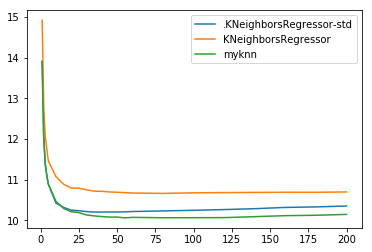

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

k=[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
ax.plot(k,case1,label=".KNeighborsRegressor-std")
ax.plot(k,case2,label="KNeighborsRegressor")
ax.plot(k,case3,label="myknn")


plt.legend(loc="upper right")
plt.draw()

In [23]:
#隨著K值增加，錯誤率會遞減，但是遞減到一定程度，遞減的幅度就沒有那麼明顯
#有標準化的數據與沒有標準化的數據相比，有做標準化的數據表現的比較好
#一開始三個模型表現都差不多，但隨著K值增加，另外兩個模型的表現程度明顯勝過沒有透過標準化的數據訓練出的模型
#自己設計的myknn模型表現最優(有可能是因為有刪除outlier的緣故)